In [1]:
import pandas as pd
import numpy as np

traindf = pd.read_json('datasets/train_dataset.json', orient='columns')
testdf = pd.read_json('datasets/test_dataset.json', orient='columns')
validdf = pd.read_json('datasets/val_dataset.json', orient='columns')



In [2]:
alldf= pd.concat([traindf, testdf, validdf], axis = 0)
alldf.head()
alldf.shape

(7853, 17)

In [3]:
alldf.dtypes


graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

# Data Preprocessing

In [4]:
"""for col in alldf.columns.to_list():
    if type(alldf[col][0])!=list:
        print(f'The {col} has these {alldf[col].unique()} unique values')
        print(f'NEXXXXXXXXXXXXXXXXXXXXXT---->')
        print(f' ')
If you have a Series and need to pass its values as arguments to such a function,
converting the Series to a tuple can be helpful.----[i]      """
for col in alldf.columns:
    #shob column er iterated col dekhbe je proti element, col er list kina, if not list then its true and may proceed to loopp..
    if not alldf[col].apply(lambda x: isinstance(x, list)).all():
    #nicher tay: if list; convert to tuple -- from [i] and print out the unique vals
        unique_values = alldf[col].apply(lambda x: tuple(x) if isinstance(x, list) else x).unique() 
        print(f'The {col} has these {unique_values} unique values')
        print('NEXXXXXXXXXXXXXXXXXXXXXT---->')
        print()

   

The graphic card type has these ['dedicated graphics' None 'integrated graphics'] unique values
NEXXXXXXXXXXXXXXXXXXXXXT---->

The communications has these [('bluetooth', 'lan 10/100/1000 mbps')
 ('wi-fi', 'bluetooth', 'lan 10/100 mbps')
 ('bluetooth', 'nfc (near field communication)') None
 ('wi-fi', 'bluetooth') ('wi-fi', 'bluetooth', 'lan 10/100/1000 mbps')
 ('nfc (near field communication)', 'gps')
 ('wi-fi 802.11 b/g/n/ac', 'bluetooth', 'lan 10/100/1000 mbps')
 ('bluetooth', 'lan 10/100 mbps')
 ('bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps', 'intel wireless display (widi)', 'nfc (near field communication)', 'modem 3g (wwan)')
 ('wi-fi 802.11 b/g/n/ac', 'bluetooth', 'lan 10/100 mbps') ('bluetooth',)
 ('bluetooth', 'lan 10/100/1000 mbps', 'intel wireless display (widi)')
 ('lan 10/100 mbps', 'nfc (near field communication)', 'gps')
 ('nfc (near field communication)',)
 ('bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps', 'intel wireless display (widi)', 'nfc (near field

 '13" - 13.9"' '11.9" and less'] unique values
NEXXXXXXXXXXXXXXXXXXXXXT---->

The buynow_price has these [4999.   2649.   3399.   ... 8740.99 2316.73 2906.21] unique values
NEXXXXXXXXXXXXXXXXXXXXXT---->



In [5]:
# 'state' column only a single value 'New' will not effect in developing a ML model
alldf = alldf.drop('state', axis =1)
#dropping any other columns that contains subsequent null values.
alldf = alldf.dropna()
#printing the dataframe
alldf.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.0


In [6]:
alldf.columns

Index(['graphic card type', 'communications', 'resolution (px)', 'CPU cores',
       'RAM size', 'operating system', 'drive type', 'input devices',
       'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price'],
      dtype='object')

In [7]:
compact = ['communications','input devices','multimedia']
alldf[compact].head()

,communications,input devices,multimedia
7233,"[bluetooth, lan 10/100/1000 mbps]","[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]"
5845,"[wi-fi, bluetooth, lan 10/100 mbps]","[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]"
5897,"[wi-fi, bluetooth]","[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]"
4870,"[wi-fi, bluetooth, lan 10/100 mbps]","[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]"
2498,"[wi-fi, bluetooth, lan 10/100/1000 mbps]","[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]"


In [8]:
"""The purpose of nicher code is to randomly sample 20 rows from the 'input devices' column
and create a new DataFrame with the sampled rows.
This can be useful for exploring a subset of the data or conducting further 
analysis on a smaller portion of the column values."""
pd.DataFrame(alldf['input devices'].to_list()).sample(20)
#shob column tar element gula ke list e banaye then otake dataframe koraise

,0,1,2,3
421,keyboard,touchpad,None,None
1801,keyboard,touchpad,illuminated keyboard,numeric keyboard
1667,keyboard,touchpad,None,None
4093,keyboard,touchpad,illuminated keyboard,None
346,keyboard,touchpad,illuminated keyboard,numeric keyboard
5382,keyboard,touchpad,numeric keyboard,None
6027,keyboard,touchpad,illuminated keyboard,numeric keyboard
4608,keyboard,touchpad,numeric keyboard,None
83,keyboard,touchpad,None,None
558,keyboard,touchpad,illuminated keyboard,None


In [9]:
pd.DataFrame(alldf['multimedia'].to_list()).sample(20)


,0,1,2,3
726,SD card reader,camera,speakers,microphone
5058,SD card reader,camera,speakers,microphone
2392,SD card reader,camera,speakers,None
2955,SD card reader,camera,speakers,microphone
2965,SD card reader,camera,speakers,microphone
898,SD card reader,camera,speakers,microphone
678,SD card reader,camera,speakers,microphone
2096,SD card reader,camera,speakers,microphone
5698,SD card reader,camera,speakers,microphone
846,SD card reader,camera,microphone,None


In [10]:
def get_unique_val(col_name):
    unique_values = set()  #edike empty set() [data structure] nisi instead of list to store
#iterate over the values of the col_name column directly, without converting it to a list.     
    for val in alldf[col_name]: 
        if isinstance(val, list): #if value==list then update korbo cz strings and nu,bers o thakte pare
            unique_values.update(val) # *update* method automatically handles duplicate elimination,jar manejust unique val print korbe 
    
    return list(unique_values)


In [11]:
print (f'UNIQUE devices :',get_unique_val('input devices'))
print (f'UNIQUE MM :',get_unique_val('multimedia'))

UNIQUE devices : ['keyboard', 'illuminated keyboard', 'numeric keyboard', 'touchpad']
UNIQUE MM : ['camera', 'SD card reader', 'speakers', 'microphone']


In [12]:
#creating a dictionary of unique values of some columns
compact_dict = {
            'communications': get_unique_val('communications'),
            'input devices': get_unique_val('input devices'),
            'multimedia': get_unique_val('multimedia'),
            }
compact_dict
                                      

{'communications': ['intel wireless display (widi)',
  'lan 10/100/1000 mbps',
  'modem 3g (wwan)',
  'bluetooth',
  'wi-fi',
  'gps',
  'nfc (near field communication)',
  'lan 10/100 mbps',
  'modem 4g (lte)',
  'wi-fi 802.11 b/g/n',
  'wi-fi 802.11 a/b/g/n/ac',
  'wi-fi 802.11 a/b/g/n',
  'wi-fi 802.11 b/g/n/ac'],
 'input devices': ['keyboard',
  'illuminated keyboard',
  'numeric keyboard',
  'touchpad'],
 'multimedia': ['camera', 'SD card reader', 'speakers', 'microphone']}

In [13]:
#ager dataframe e (7853, 17) chilo, it got reduced due to putting unique values only
alldf.shape

(6109, 16)

In [14]:
alldf['RAM size'].head()

7233    32 gb
5845     8 gb
5897     8 gb
4870     8 gb
2498     8 gb
Name: RAM size, dtype: object

In [15]:
#df['RAM size'] = df['RAM size'].str.replace(' gb', '', regex=True).astype('int32')
'''https://www.regular-expressions.info/shorthand.html, ekhane /d er meaning ta ase
str.extract('(\d+)', expand=False) extracts the numeric part 
from each value using the regular expression (\d+) 
and expand = False in cases where you only need the extracted values as a Series'''
alldf['RAM size'] = alldf['RAM size'].str.extract('(\d+)', expand =False).astype('int32')
alldf['RAM size']

7233    32
5845     8
5897     8
4870     8
2498     8
        ..
5429     8
4433    16
3982     4
9673    16
4277     8
Name: RAM size, Length: 6109, dtype: int32

In [16]:
alldf['screen size'].head()

7233    17" - 17.9"
5845    15" - 15.9"
5897    12" - 12.9"
4870    15" - 15.9"
2498    17" - 17.9"
Name: screen size, dtype: object

In [17]:
alldf['screen size'] = alldf['screen size'].str.extract('(\d+)', expand= False).astype('int32')
alldf['screen size']

7233    17
5845    15
5897    12
4870    15
2498    17
        ..
5429    15
4433    15
3982    15
9673    15
4277    15
Name: screen size, Length: 6109, dtype: int32

In [18]:
#df['resolution_x'] = df['resolution (px)'].apply(lambda x: int(x.split(' x ')[0]))
#df['resolution_y'] = df['resolution (px)'].apply(lambda x: int(x.split(' x ')[1]))
#alldf[['resolution_x', 'resolution_y']] = alldf['resolution (px)'].str.extract('(\d+)', expand=True).astype('int32')
alldf[['resolution_l', 'resolution_w']] = alldf['resolution (px)'].str.split(' x ', expand=True).astype('int32')
alldf[['resolution_l', 'resolution_w']].head()

,resolution_l,resolution_w
7233,1920,1080
5845,1366,768
5897,2560,1440
4870,1366,768
2498,1920,1080


In [19]:
alldf.drop(columns= 'resolution (px)', inplace= True)

In [20]:
alldf.columns

Index(['graphic card type', 'communications', 'CPU cores', 'RAM size',
       'operating system', 'drive type', 'input devices', 'multimedia',
       'RAM type', 'CPU clock speed (GHz)', 'CPU model',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price',
       'resolution_l', 'resolution_w'],
      dtype='object')

In [21]:
num_col = ['CPU cores','RAM size','CPU clock speed (GHz)','drive memory size (GB)','screen size','resolution_l', 'resolution_w']
'''#series e nile oi series dtype convert korte parena bolei converting into df
like alldf[num_col] '''
num_col_df = alldf[num_col].astype('float16')
num_col_df.head()

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_l,resolution_w
7233,4.0,32.0,2.599609,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.400391,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.200195,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.000000,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.400391,1000.0,17.0,1920.0,1080.0


# ONE HOT ENCODING

In [22]:
dummies_df = alldf['operating system'].str.get_dummies()
dummies_df.head(5)


,['no system'],['other'],"['windows 10 home', 'other']",['windows 10 home'],"['windows 10 professional', 'other']",['windows 10 professional'],"['windows 7 home 64-bit', 'other']","['windows 7 home 64-bit', 'windows 7 professional 64-bit', 'windows 10 professional']",['windows 7 home 64-bit'],"['windows 7 professional 32-bit', 'windows 7 professional 64-bit', 'windows 10 professional']","['windows 7 professional 64-bit', 'windows 10 professional']","['windows 7 professional 64-bit', 'windows 8.1 professional 64-bit', 'windows 10 professional']",['windows 7 professional 64-bit'],"['windows 8.1 home 32-bit', 'other']",['windows 8.1 home 32-bit'],"['windows 8.1 home 64-bit', 'other']","['windows 8.1 home 64-bit', 'windows 10 home']",['windows 8.1 home 64-bit'],['windows 8.1 professional 32-bit'],['windows 8.1 professional 64-bit']
7233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5845,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5897,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4870,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
dummies_df = alldf['operating system'].str.join('|').str.get_dummies()
dummies_df.head(5)

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0


In [24]:
''' dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()  
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
    
ekhane, passing the prefix='' argument, each dummy variable column will have no prefix.
    The prefix_sep='' argument sets an empty separator between the column name 
    and the value.'''
    
dummy_cols = ['drive type', 'RAM type', 'CPU model']
add_dummies_df = pd.get_dummies(alldf[dummy_cols], prefix='', prefix_sep='')

dummies_df = pd.concat([dummies_df,add_dummies_df], axis=1)
dummies_df.head()

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# check remaining columns
label_col = ['buynow_price']
categorical_columns = [thecolumn for thecolumn in alldf.columns.to_list() if thecolumn not in compact + label_col + num_col + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [26]:
#as we have 2 remaining cols, so we have to hot encode them
cat_df= pd.get_dummies(alldf[categorical_columns])
cat_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0
...,...,...,...,...
5429,1,0,1,0
4433,1,0,1,0
3982,1,0,1,0
9673,1,0,1,0


In [27]:
# put unique_vals to compact columns
unique_col = list() #empty list e nilam
for col in compact: #compact er oi dataframe theke each column ke iterate krbo
    unique_col += compact_dict[col] #taking compact_dict columns
#new dataframe create kore oitate unique columns guloke 0 banabo acc to the index no of original dataframe and 
#data thakbe an array of zeroes in a shape of (row, columns) jekhane row = alldf.shape[0] and column = length of unique columns jeta shabhabik
#alldf.shape[0] is for row and alldf.shape[1] column er jonno like 100x50 thakle 100 is for shape[0] & 50 for the other
uniquebecomes0 = pd.DataFrame(columns= unique_col, index= alldf.index, data = np.zeros((alldf.shape[0],len(unique_col))))
uniquebecomes0.head()

,intel wireless display (widi),lan 10/100/1000 mbps,modem 3g (wwan),bluetooth,wi-fi,gps,nfc (near field communication),lan 10/100 mbps,modem 4g (lte),wi-fi 802.11 b/g/n,...,wi-fi 802.11 a/b/g/n,wi-fi 802.11 b/g/n/ac,keyboard,illuminated keyboard,numeric keyboard,touchpad,camera,SD card reader,speakers,microphone
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
for col, unique_list in compact_dict.items():
    print(f'the column is:{col}\n ')
    print(f'where the unique lists are:\n {unique_list}\n ')
    print(f'compact : {compact}')

the column is:communications
 
where the unique lists are:
 ['intel wireless display (widi)', 'lan 10/100/1000 mbps', 'modem 3g (wwan)', 'bluetooth', 'wi-fi', 'gps', 'nfc (near field communication)', 'lan 10/100 mbps', 'modem 4g (lte)', 'wi-fi 802.11 b/g/n', 'wi-fi 802.11 a/b/g/n/ac', 'wi-fi 802.11 a/b/g/n', 'wi-fi 802.11 b/g/n/ac']
 
compact : ['communications', 'input devices', 'multimedia']
the column is:input devices
 
where the unique lists are:
 ['keyboard', 'illuminated keyboard', 'numeric keyboard', 'touchpad']
 
compact : ['communications', 'input devices', 'multimedia']
the column is:multimedia
 
where the unique lists are:
 ['camera', 'SD card reader', 'speakers', 'microphone']
 
compact : ['communications', 'input devices', 'multimedia']


In [29]:
# If the computer includes the column name as a feature assign 1, otherwise 0

for col, unique_list in compact_dict.items():
    for uniqueCOL in unique_list: #iterate hocche every column in that list
#each column e ekhane oi 0 place gulake fill korbe with 1 if the compluter tells a column name is a feature otherwise 0        
       uniquebecomes0[uniqueCOL]=alldf[col].apply(lambda x: 1 if uniqueCOL in x else 0)
compact_df = uniquebecomes0
compact_df.head()

,intel wireless display (widi),lan 10/100/1000 mbps,modem 3g (wwan),bluetooth,wi-fi,gps,nfc (near field communication),lan 10/100 mbps,modem 4g (lte),wi-fi 802.11 b/g/n,...,wi-fi 802.11 a/b/g/n,wi-fi 802.11 b/g/n/ac,keyboard,illuminated keyboard,numeric keyboard,touchpad,camera,SD card reader,speakers,microphone
7233,0,1,0,1,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,1,1,1,1,1
5897,0,0,0,1,1,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
4870,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,1,1,1,1,1
2498,0,1,0,1,1,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


### Realization about the above codes and why it was done for
- The purpose of initializing the DataFrame with zeros is to create a placeholder structure where the unique values will be filled in later. The zeros act as a default value before assigning the actual unique values.

- Once the DataFrame is created, you can replace the zeros with the unique values using appropriate logic or operations based on your specific requirements

In [30]:
#now shob concat kore felbo for our next steps, axis=1 for column
newdf = pd.concat([dummies_df,cat_df,compact_df,num_col_df],axis = 1)
newdf.head()

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,SD card reader,speakers,microphone,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_l,resolution_w
7233,1,0,0,0,0,0,0,0,0,0,...,1,1,1,4.0,32.0,2.599609,1250.0,17.0,1920.0,1080.0
5845,0,0,1,0,0,0,0,0,0,0,...,1,1,1,4.0,8.0,2.400391,256.0,15.0,1366.0,768.0
5897,0,0,1,0,0,0,0,0,0,0,...,1,1,1,4.0,8.0,1.200195,256.0,12.0,2560.0,1440.0
4870,0,0,1,0,0,0,0,0,0,0,...,1,1,1,2.0,8.0,2.000000,1000.0,15.0,1366.0,768.0
2498,0,1,0,0,0,0,0,0,1,0,...,1,1,1,4.0,8.0,2.400391,1000.0,17.0,1920.0,1080.0


# Multicollinearity Check

- refers to the presence of high correlation between independent variables in a regression model
- We will check it through Variance Inflation Factor (VIF). 
- We will eliminate all features that have VIF score above 20. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [31]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Explanation of the above code
- '''The **statsmodels.stats.outliers_influence** module in the statsmodels library provides functions and classes for performing statistical analysis and diagnostics on linear regression models. It includes methods for detecting outliers, influential observations, 
and computing various measures of influence on regression results.'''

- The lines **import warnings** and **warnings.filterwarnings('ignore')** are used to suppress warnings that may be generated during the analysis.

- In data analysis, it's common to encounter warnings that are issued by various libraries or modules being used. These warnings can be related to deprecated features, potential numerical instability, 
or other issues that may not necessarily affect the outcome of the analysis but could clutter the output or distract the user.

In [32]:
def COMPUTINGvif(features): #taking a function
    vif_data = pd.DataFrame() #empty dataframe
    vif_data['feature'] = features #empty column
#creating a column VIF where we have to change any columns of the dataframe 'newdf'.
    vif_data['VIF'] = [variance_inflation_factor(newdf[features].values,i) for i in range (len(features))]
    return vif_data.sort_values(by = ['VIF']).reset_index(drop = True)

- difference between using a normal loop and enumerate() lies in the ability to access both the elements and their indices in a concise and readable way.
- The variance_inflation_factor() function from the statsmodels.stats.outliers_influence module expects the second argument to be an index. It uses this index to access the corresponding column in the array and calculate the VIF.
- It uses a list comprehension to iterate over the range of indices of the features list. For each index i, it computes the VIF using the variance_inflation_factor function, passing the feature values 

In [33]:
features = newdf.columns.to_list()
vif_data = COMPUTINGvif(features)
vif_data.head()

,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032274
2,windows 7 professional 32-bit,1.038890
3,wi-fi 802.11 a/b/g/n,1.074409
4,wi-fi 802.11 a/b/g/n/ac,1.120752


In [34]:
selected_features = vif_data['feature'].values.tolist() #all the features are gathered into a new variable selected_feature and jokhon chabo tokhon etake newdf[selected_feature] deke anabo
vif_data.head()

,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032274
2,windows 7 professional 32-bit,1.038890
3,wi-fi 802.11 a/b/g/n,1.074409
4,wi-fi 802.11 a/b/g/n/ac,1.120752


In [35]:
#1
mul_col = True
while mul_col:#2
    highest_vif_features = vif_data['feature'].values.tolist()[-1]#3
    print(f'The column : *{highest_vif_features}* has the highest vif feature and is to be removed\n')
    features.remove(highest_vif_features)#4
    vif_data= COMPUTINGvif(features) #5
    mul_col = False if len(vif_data[vif_data.VIF>20])==0 else True #6
    
selected_ft_col= vif_data['feature'].values.tolist() #7
vif_data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

The column : *intel pentium dual-core* has the highest vif feature and is to be removed

The column : *warranty_seller warranty* has the highest vif feature and is to be removed

The column : *graphic card type_integrated graphics* has the highest vif feature and is to be removed

The column : *emmc* has the highest vif feature and is to be removed

The column : *ddr4* has the highest vif feature and is to be removed

The column : *resolution_l* has the highest vif feature and is to be removed

The column : *touchpad* has the highest vif feature and is to be removed

The column : *screen size* has the highest vif feature and is to be removed

The column : *camera* has the highest vif feature and is to be removed

The column : *CPU clock speed (GHz)* has the highest vif feature and is to be removed

The column : *windows 10 home* has the highest vif feature and is to be removed

The column : *ssd* has the highest vif feature and is to be removed

The column : *keyboard* has the highest 

,feature,VIF
0,windows 8.1 professional 32-bit,1.004328
1,windows 7 home 64-bit,1.007961
2,windows 7 professional 32-bit,1.022507
3,windows 8.1 home 32-bit,1.029390
4,intel celeron m,1.043487
5,intel core m,1.063075
6,wi-fi 802.11 a/b/g/n,1.072515
7,windows 8.1 professional 64-bit,1.078652
8,amd a4,1.087484
9,amd e1,1.092006


1. #elmination of columns >20 and keeping those columns where vif<20
2. #"while refers to a loop or condition that continues as long as multicollinearity is true.
3. #ekhane values extract kortese from feature column and turning into a python list and iterating in a descending way
4.  #removing the features which is columns that are >20 or multicollinearity is true
5. calling function
6. #length jodi 0 hoi then false, which means sheta <20 and remove hobena or is out of the loop
7. function calling er empty column
- [-1]: Indexing is used to select the last element from the list, which corresponds to the feature with the highest VIF.
- elimination of columns that has >20 VIFs

#### Showing graph of multicollinearity

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
newdf[selected_features].head() #hot-encoded columns

,windows 7 home 64-bit,windows 8.1 professional 32-bit,windows 7 professional 32-bit,wi-fi 802.11 a/b/g/n,wi-fi 802.11 a/b/g/n/ac,wi-fi 802.11 b/g/n/ac,wi-fi 802.11 b/g/n,touchpad,windows 8.1 professional 64-bit,windows 8.1 home 32-bit,...,intel core i3,intel core i5,intel core i7,intel core m,intel pentium quad-core,other CPU,graphic card type_dedicated graphics,graphic card type_integrated graphics,amd e1,intel pentium dual-core
7233,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
5845,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
5897,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4870,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2498,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [38]:
alldf[label_col].head() #our target

,buynow_price
7233,4999.0
5845,2649.0
5897,4499.0
4870,2099.0
2498,2699.0


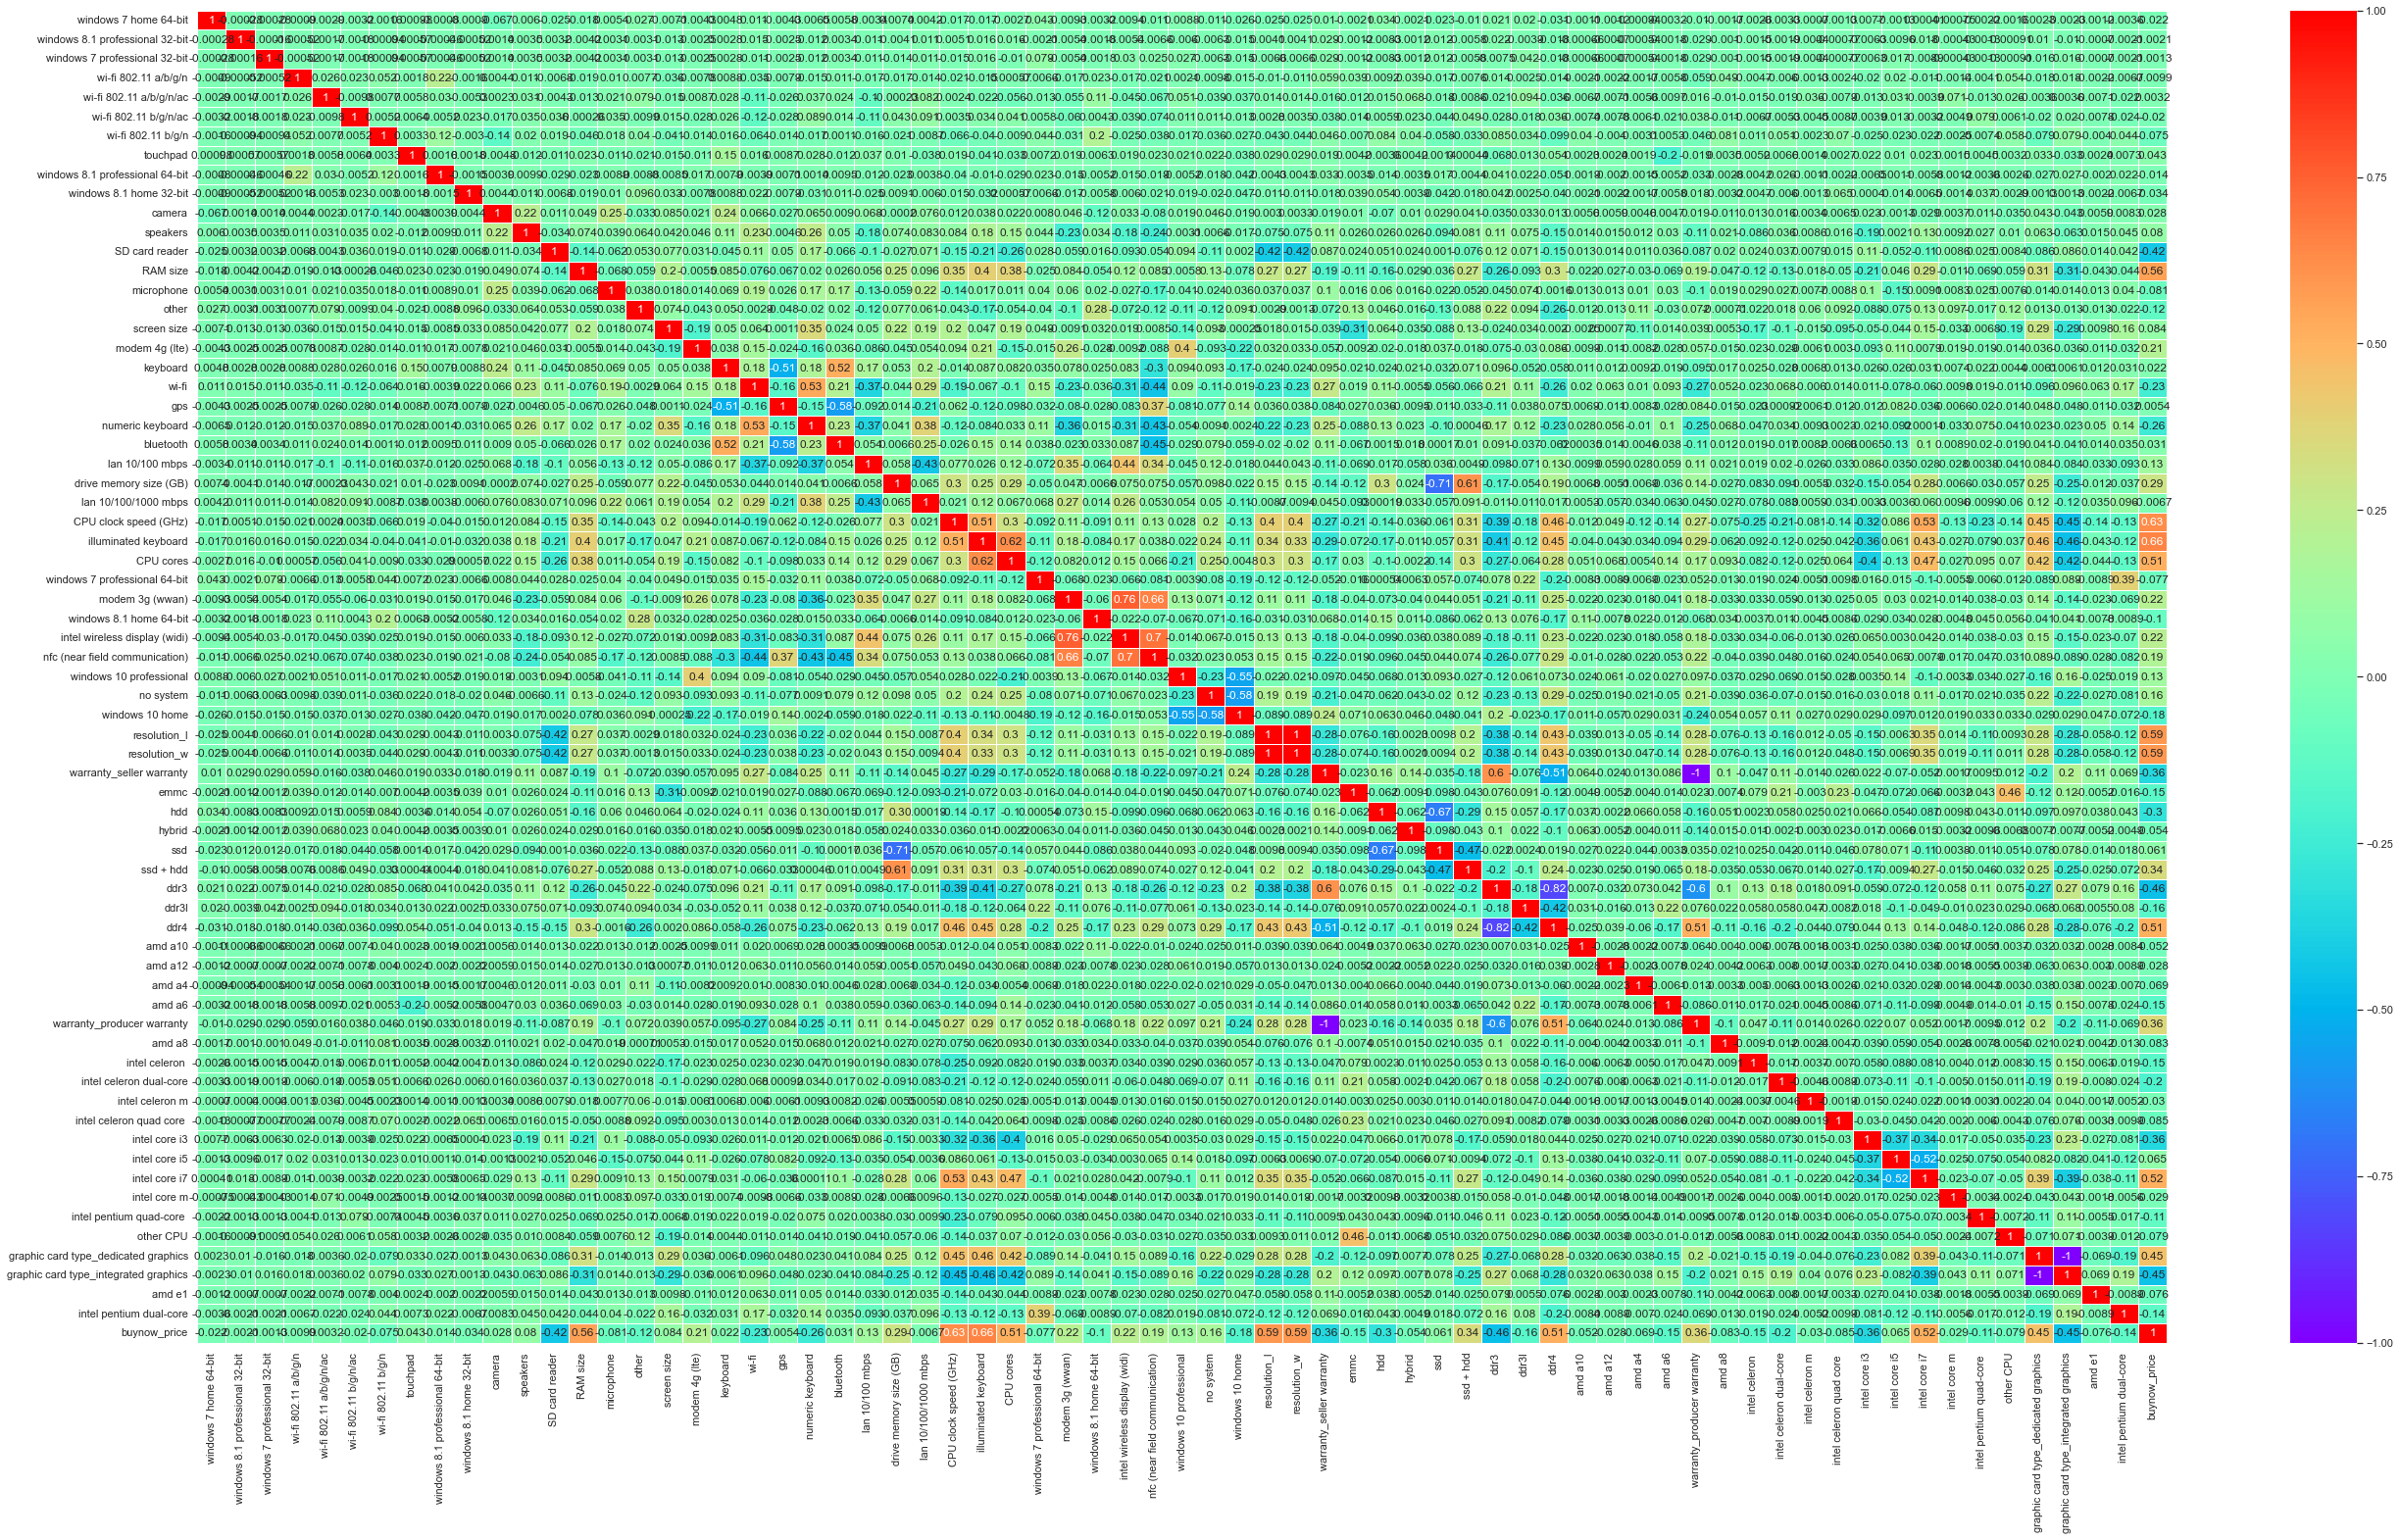

In [39]:
plt.figure(figsize=(45,25)) # width and height in inches
#ekhane concatenating with hot encoded columns that we extracted wiith our target
sns.set_theme(style="dark")
#taking a correlation df where those are concatenated : shob column er shathe target koto tuku correlated. near to 1b
corr_df = pd.concat([newdf[selected_features], alldf[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True,cmap='rainbow', lw=1)
plt.show()

1. The diagonal elements of a correlation heatmap **do not provide** any additional information **or impact** the interpretation of correlations between different variables. They serve as **reference points** to indicate the perfect correlation of each variable with itself. These values are **not informative** in terms of the relationship between different variables since they are always maximum and do not vary.
2. When interpreting a correlation heatmap, the focus is typically on the **off-diagonal** elements, which represent the correlations between different pairs of variables. These **non-diagonal** elements provide insights into the relationships and patterns between different variables, helping to identify strong, moderate, or weak correlations and their directions.

# Train/Val/Test Split

In [40]:
# droppin any null numbers of the dataset and remaining index rekhe de
train_i = traindf.dropna().index
val_i   = validdf.dropna().index
test_i  = testdf.dropna().index
# creates a new DataFrame each that contains the indices of the non-null rows 


In [41]:
traindf = newdf.loc[train_i]
validdf= newdf.loc[val_i]
testdf= newdf.loc[test_i]
#filters new_df to include only the rows that have non-null values in any of the df's indices.

In [42]:
#all the values except the target value taken as x
x_train, x_val, x_test = traindf[selected_features].to_numpy(), validdf[selected_features].to_numpy(),testdf[selected_features].to_numpy()
#all the target value taken as y
y_train, y_val, y_test =alldf.loc[train_i][label_col].to_numpy().ravel(), alldf.loc[val_i][label_col].to_numpy().ravel(), alldf.loc[test_i][label_col].to_numpy().ravel()


In [43]:
x_val.shape

(1215, 68)

In [44]:
x_train.shape

(3694, 68)

In [45]:
y_train.shape

(3694,)

## Classical Machine Learning

We will implement and try different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error as instructed. We will scale our data with MaxAbsScaler() from sklearn, which works well with sparse datasets.

In [46]:
traindf.head()

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,SD card reader,speakers,microphone,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_l,resolution_w
7233,1,0,0,0,0,0,0,0,0,0,...,1,1,1,4.0,32.0,2.599609,1250.0,17.0,1920.0,1080.0
5845,0,0,1,0,0,0,0,0,0,0,...,1,1,1,4.0,8.0,2.400391,256.0,15.0,1366.0,768.0
5897,0,0,1,0,0,0,0,0,0,0,...,1,1,1,4.0,8.0,1.200195,256.0,12.0,2560.0,1440.0
4870,0,0,1,0,0,0,0,0,0,0,...,1,1,1,2.0,8.0,2.000000,1000.0,15.0,1366.0,768.0
2498,0,1,0,0,0,0,0,0,1,0,...,1,1,1,4.0,8.0,2.400391,1000.0,17.0,1920.0,1080.0


In [47]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error

from sklearn.neural_network import MLPRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor



RMSE of Linear is: 3978047650667.381
RMSE of MLP is: 688.4599267620366
RMSE of Decision Tree is: 719.8969346998655
RMSE of Random Forest is: 522.5500868505686
RMSE of Gradient Boosting is: 534.9528784238828
RMSE of Extra Trees is: 536.9892411757457


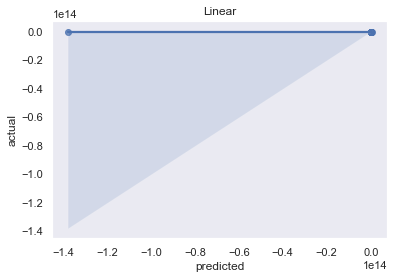

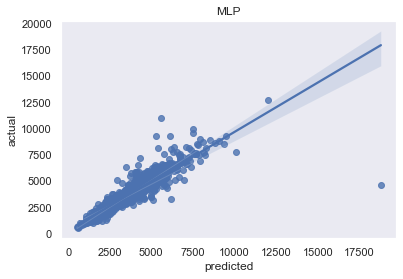

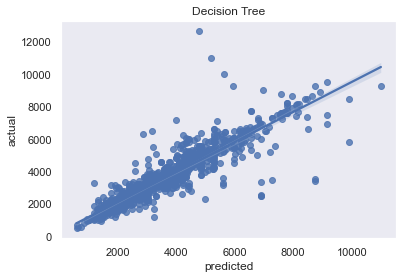

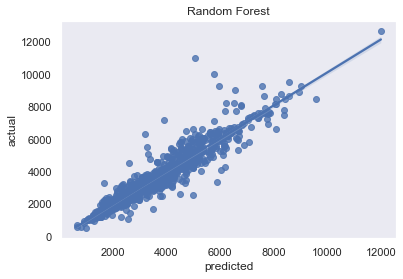

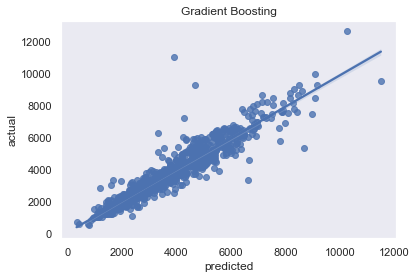

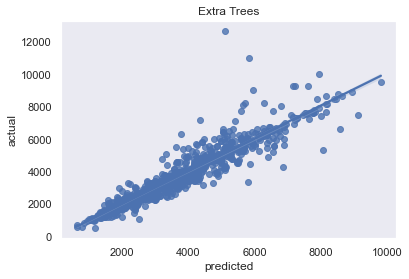

In [48]:
def RMSE(target, prediction):
    return mean_squared_error(target, prediction, squared= False)

def regression(name, all_regressor):
    #pipeline contsruction
    pipe = make_pipeline(MaxAbsScaler(), all_regressor) #make_pipeline(scaling,algorithm)
    pipe.fit(x_train, y_train) #fitting into a regression algo through scaling by MaxABSscaler
    predicted = pipe.predict(x_test) #finally prediction on our x
    #rmse
    rmse_value = RMSE(y_test, predicted)#rmse between actual-our prediction
    #printing rmse
    print(f'RMSE of {name} is: {rmse_value}')
    
    #recreating a new dataframe for the predicted values we got from ml models and the actual is done below since it cant be accessed
    PredictedDF[name+' Prediction']= predicted   
    #plotting
    plt.figure(name)
    plt.title(name)
    
    plt.xlabel('predicted')
    plt.ylabel('actual')
    #linear with scatter plot from seaborn
    sns.regplot(y = y_test, x = predicted)


#all regressors
regressors = {
    'Linear' : LinearRegression(),
    'MLP' : MLPRegressor(random_state =46, max_iter = 450, learning_rate = 'constant',learning_rate_init = 0.6),
    'Decision Tree' : DecisionTreeRegressor(max_depth= 14, random_state= 46),
    'Random Forest' : RandomForestRegressor(random_state = 46),
    'Gradient Boosting' : GradientBoostingRegressor(random_state= 46,criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
   'Extra Trees' : ExtraTreesRegressor(random_state=46, n_estimators = 100)
}
#keeping the predictedDF here as it would not access inside the function
PredictedDF = pd.DataFrame({'Actual': y_test})

for val in regressors.keys():
    regression(val,regressors[val])

In [49]:
#the new predicted dataframe of the ML algo that's implemented
PredictedDF.head()


,Actual,Linear Prediction,MLP Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction,Extra Trees Prediction
0,2369.0,2443.25,2124.363705,2142.333333,2326.350000,2379.984469,2369.000000
1,2299.0,2479.75,2147.975490,2261.000000,2295.920000,2157.830948,2299.000000
2,5999.0,5071.25,5042.822113,5302.885714,5192.150000,5383.450904,5167.500000
3,1299.0,1023.75,1256.987709,1341.578947,1284.872619,1266.408030,1282.333333
4,3329.0,5747.75,6204.524081,6899.000000,5889.766667,6628.888509,5804.250000


- **sns.regplot**: This function is from the **Seaborn **library and is used to create a scatter plot with a fitted regression line.
- **Extra Trees Regressor** is an ensemble learning method that combines multiple decision trees to make predictions. It operates similarly to Random Forest, but with some differences in how the trees are built. By using a larger number of trees (100 in this case), the model has the potential to capture more complex patterns in the data and improve prediction accuracy.

- **Voting Regression**, also known as **Ensemble Regression**, is a technique in machine learning where multiple regression models are combined to make predictions. It is based on the principle that combining the predictions of multiple models can often result in more accurate and robust predictions compared to using a single model.

RMSE of Voting is: 481.7706941053904


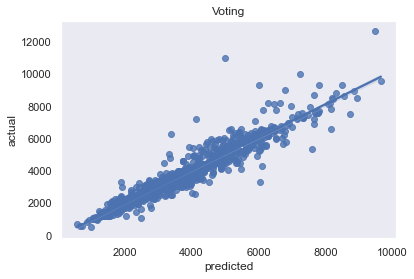

In [50]:
#from sklearn.ensemble import VotingRegressor
#3 of the best performing learning model has been chosen and would be undergone
#in a voting way
regress1 = regressors['Gradient Boosting']
regress2 = regressors['Extra Trees']
regress3 = regressors['Random Forest']



regression('Voting', VotingRegressor([('grad',regress1), ('ex',regress2),( 'RF',regress3)], weights = [0.35,0.44,0.65]))

- Lower RMSE values generally indicate better predictive performance

# Feature Selection

Feature selection hurts the performance of this task. However, it is always best to present all the methods applied through the assignment. Hence, we are representing it also. We used f_regression and RandomForestRegressor.modelimportances to check feature importance. We decided on k=25, but you can change and see the results for different k values.

- measures the linear dependency between each feature and the target variable

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression
#i'm selecting top 15 features based on f_regression
f_selector = SelectKBest(f_regression,k=15)
x = newdf[selected_features].to_numpy()
y = alldf[label_col].to_numpy().ravel()
f_selector.fit(x,y)
# below line of code retrieves the column names of the 
#selected features after applying feature selection and stores them in the f_col list.
f_col = newdf[selected_features].columns[f_selector.get_support()].to_list()
f_col

['SD card reader',
 'RAM size',
 'CPU clock speed (GHz)',
 'illuminated keyboard',
 'CPU cores',
 'resolution_l',
 'resolution_w',
 'warranty_seller warranty',
 'ddr3',
 'ddr4',
 'warranty_producer warranty',
 'intel core i3',
 'intel core i7',
 'graphic card type_dedicated graphics',
 'graphic card type_integrated graphics']

In [52]:
#all the values except the target value taken as x
#previously pipelining and now feature selections
#previously i worked my training data with 'selected_features', for f_selection im working with the updated 'f_col'
x_train, x_val, x_test = traindf[f_col].to_numpy(), validdf[f_col].to_numpy(),testdf[f_col].to_numpy()
#all the target value taken as y
y_train, y_val, y_test =alldf.loc[train_i][label_col].to_numpy().ravel(), alldf.loc[val_i][label_col].to_numpy().ravel(), alldf.loc[test_i][label_col].to_numpy().ravel()


RMSE of Random Forest is: 725.9915400657


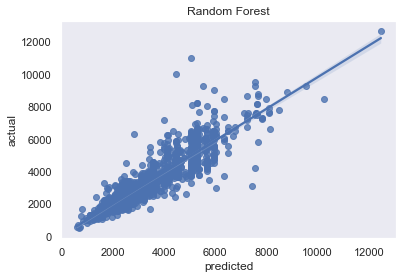

In [53]:
regression('Random Forest', regressors['Random Forest'])

When using ensemble models like **Random Forest, Extra Trees, or Gradient Boosting**, **model.feature_importances_** returns an array or list of feature importance scores, where each score corresponds to a specific feature in dataset. These scores indicate the relative importance or contribution of each feature in the model's prediction process.

In [54]:
#again, feature importances calculation is needed to realize about the importance of each feature relating to their target value
x= newdf[selected_features].values
#all the values except the target value taken as x
x_train, x_val, x_test = traindf[selected_features].to_numpy(), validdf[selected_features].to_numpy(),testdf[selected_features].to_numpy()
#all the target value taken as y
y_train, y_val, y_test =alldf.loc[train_i][label_col].to_numpy().ravel(), alldf.loc[val_i][label_col].to_numpy().ravel(), alldf.loc[test_i][label_col].to_numpy().ravel()

#model selection
model = RandomForestRegressor(random_state=46)
#fitting model
model.fit(x_train, y_train)
#getting importance relating to their target
importance = model.feature_importances_
#summarizing feature importances
for index_no, score in enumerate(importance):
    print(f'{index_no+1}: This *{selected_features[index_no]}* feature has a score of *{score}*\n')

1: This *windows 7 home 64-bit* feature has a score of *0.0*

2: This *windows 8.1 professional 32-bit* feature has a score of *5.20572655964145e-07*

3: This *windows 7 professional 32-bit* feature has a score of *0.0*

4: This *wi-fi 802.11 a/b/g/n* feature has a score of *0.0005187573768462372*

5: This *wi-fi 802.11 a/b/g/n/ac* feature has a score of *0.0005250679321948243*

6: This *wi-fi 802.11 b/g/n/ac* feature has a score of *0.0004901489776082972*

7: This *wi-fi 802.11 b/g/n* feature has a score of *8.663281245576042e-05*

8: This *touchpad* feature has a score of *0.00022032432075823704*

9: This *windows 8.1 professional 64-bit* feature has a score of *0.0005050912524056787*

10: This *windows 8.1 home 32-bit* feature has a score of *3.9638038613173974e-05*

11: This *camera* feature has a score of *0.00017418318763615486*

12: This *speakers* feature has a score of *0.0006558390913560334*

13: This *SD card reader* feature has a score of *0.04444735578808788*

14: This *RA

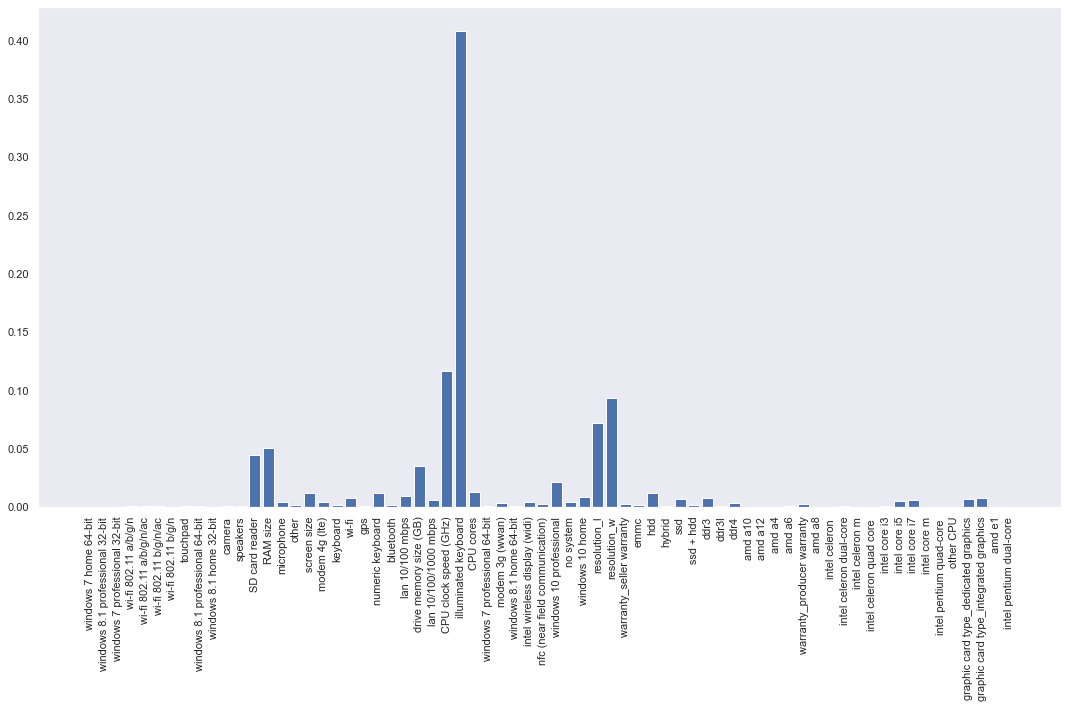

In [55]:
#plotting
plt.figure(figsize = (15,10))
plt.bar(selected_features, importance)
plt.xticks(rotation=90) #the writings are shown vertically rather than horizontal where the letters would be much congested
plt.tight_layout()
plt.show()

In [56]:
#for the main part, calculating the features that have high importances
HIGH = np.array(selected_features) [importance>0.03].tolist()
HIGH

['SD card reader',
 'RAM size',
 'drive memory size (GB)',
 'CPU clock speed (GHz)',
 'illuminated keyboard',
 'resolution_l',
 'resolution_w']

- **to_list()** is used with **pandas objects like a dataframe's stuff** to convert them into a list, while **tolist()** is used with **numpy arrays** to convert them into a list.

In [57]:
#all the values except the target value taken as x
#i'm gonna implement a random forest with the new high importance feature extraction
x_train, x_val, x_test = traindf[HIGH].to_numpy(), validdf[HIGH].to_numpy(),testdf[HIGH].to_numpy()
#all the target value taken as y
y_train, y_val, y_test =alldf.loc[train_i][label_col].to_numpy().ravel(), alldf.loc[val_i][label_col].to_numpy().ravel(), alldf.loc[test_i][label_col].to_numpy().ravel()


RMSE of Random Forest is: 703.4261899864775


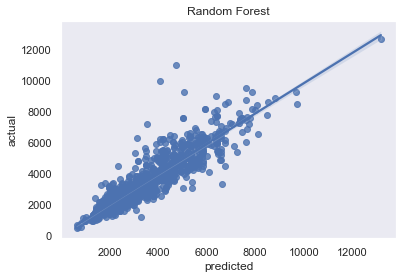

In [58]:
regression('Random Forest', regressors['Random Forest'])

***It has been observed that the original Random forest or the original feature set provided better result than the one with highest importances***

# Assignment
1. Implement GridSearch and Cross Validation for every regression model
2. Use X_val, y_val for validation and on final tuned model check with X_test, y_test

In [59]:
from sklearn.svm import SVR
'''newdf[selected_features]
alldf[label_col]'''
#fittin a regression model
model = SVR()
#tuning a hyperparametre
parametres ={ 
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
     'C': [1,3,5,7] #regularization strength
    }


In [60]:
#gridsearching
from sklearn.model_selection import GridSearchCV

gridsearching = GridSearchCV(model, parametres, cv=2)

In [61]:
#fitting the model
#all the values except the target value taken as x
x_train, x_val, x_test = traindf[selected_features].to_numpy(), validdf[selected_features].to_numpy(),testdf[selected_features].to_numpy()
#all the target value taken as y
y_train, y_val, y_test =alldf.loc[train_i][label_col].to_numpy().ravel(), alldf.loc[val_i][label_col].to_numpy().ravel(), alldf.loc[test_i][label_col].to_numpy().ravel()

#fitting the data above to our model 
gridsearching.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [1, 3, 5, 7],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [62]:
svc_results = pd.DataFrame(gridsearching.cv_results_)
svc_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,4.446394,0.657205,0.163550,0.027594,1,linear,"{'C': 1, 'kernel': 'linear'}",0.697219,0.678963,0.688091,0.009128,4
1,0.222743,0.010534,0.156269,0.005269,1,poly,"{'C': 1, 'kernel': 'poly'}",0.220782,0.186501,0.203641,0.017141,8
2,0.259380,0.007523,0.535785,0.011542,1,rbf,"{'C': 1, 'kernel': 'rbf'}",-0.003931,0.009233,0.002651,0.006582,12
3,0.318072,0.001002,0.254870,0.002007,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",-0.040476,-0.029762,-0.035119,0.005357,13
4,16.848590,0.795481,0.152762,0.017814,3,linear,"{'C': 3, 'kernel': 'linear'}",0.754562,0.742297,0.748430,0.006133,3


In [63]:
svc_results_necessary = svc_results[['param_C','params','mean_test_score']]
svc_results_necessary

,param_C,params,mean_test_score
0,1,"{'C': 1, 'kernel': 'linear'}",0.688091
1,1,"{'C': 1, 'kernel': 'poly'}",0.203641
2,1,"{'C': 1, 'kernel': 'rbf'}",0.002651
3,1,"{'C': 1, 'kernel': 'sigmoid'}",-0.035119
4,3,"{'C': 3, 'kernel': 'linear'}",0.748430
5,3,"{'C': 3, 'kernel': 'poly'}",0.249256
6,3,"{'C': 3, 'kernel': 'rbf'}",0.063134
7,3,"{'C': 3, 'kernel': 'sigmoid'}",-0.044009
8,5,"{'C': 5, 'kernel': 'linear'}",0.771326
9,5,"{'C': 5, 'kernel': 'poly'}",0.258740


In [64]:
#just sorting for ease
svc_results_necessary_sorted = svc_results_necessary.sort_values(by='mean_test_score', ascending=False)
svc_results_necessary_sorted.head()

,param_C,params,mean_test_score
12,7,"{'C': 7, 'kernel': 'linear'}",0.785963
8,5,"{'C': 5, 'kernel': 'linear'}",0.771326
4,3,"{'C': 3, 'kernel': 'linear'}",0.748430
0,1,"{'C': 1, 'kernel': 'linear'}",0.688091
13,7,"{'C': 7, 'kernel': 'poly'}",0.262351


In [65]:
# Getting the best model and its hyperparameters 
best_model = gridsearching.best_estimator_
best_hyperparametre = gridsearching.best_params_
highest_accuracy = gridsearching.best_score_
print(f'The best model is: {best_model}\n')
print(f'The best hyperparametre is: {best_hyperparametre}\n')
print(f'The best score is: {highest_accuracy} or {highest_accuracy*100:.2f}%')

The best model is: SVR(C=7, kernel='linear')

The best hyperparametre is: {'C': 7, 'kernel': 'linear'}

The best score is: 0.7859632522921978 or 78.60%


In [66]:
#fitting the best model on the training data again
best_model.fit(x_train, y_train)

SVR(C=7, kernel='linear')

In [67]:
#now predicting that on validation data as ordered
y_pred = best_model.predict(x_val)
y_pred

array([5607.70671522, 2386.9354124 , 6138.64896363, ..., 2580.51406717,
       5895.92660206, 4717.69595849])

In [68]:
#RMSE(y_pred, y_val)
from sklearn.metrics import r2_score
mse = mean_squared_error(y_val, y_pred)
r2score = r2_score(y_val, y_pred)
print(f'The Mean Sq Error is: {mse}\n')
print(f'The R2 score is: {r2score} or {r2score*100:.2f}%\n')


The Mean Sq Error is: 869666.195813019

The R2 score is: 0.6845767049301288 or 68.46%



In [71]:
# after that, Fitting the best model on the combined training and validation data
x_combo_val = np.concatenate([x_train, x_val],axis = 0)
y_combo_val = np.concatenate([y_train, y_val],axis = 0)
y_combo_pred= best_model.fit(x_combo_val, y_combo_val)

In [72]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
y_test

array([2369., 2299., 5999., ..., 3799., 5589., 8678.])

In [75]:
#predicting the test value
y_pred_test = best_model.predict(x_test)

In [76]:
#Evaluating the final tuned model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2score_test = r2_score(y_test, y_pred_test)
print(f'The Mean Sq Error is: {mse_test}\n')
print(f'The R2 score is: {r2score_test} or {r2score_test*100:.2f}%\n')


The Mean Sq Error is: 1544816.887227586

The R2 score is: 0.45502617128784906 or 45.50%



- The implementation of gridsearch through cross validation is shown above and it also shows the use of validation data and hyperparametres tuning and predicting the test value based on the best model and finally error calculating and accuracy measuring in the last between predicted test value with test target value